In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import tensorflow as tf
import tensorflow_hub as hub
from bddfunc import sliding_window

W0601 21:13:28.835259 47232749738432 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


(720, 1280, 3)


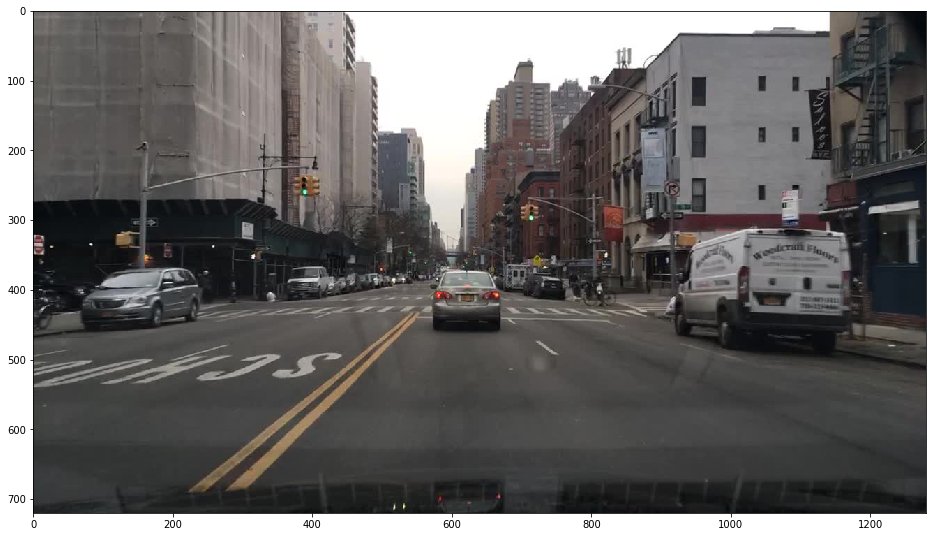

In [3]:
# choose an appropriate test image to try
data_path = Path('./data/bdd100k/images/100k/train')
imgs = [data_path / x for x in os.listdir(data_path)]
x1 = plt.imread(str(imgs[128])) # looks good
plt.figure(figsize=(16,12))
plt.imshow(x1)
print(x1.shape)

In [4]:
# sliding window
windows, cx, cy = sliding_window(np.reshape(x1, (1, 720, 1280, 3)), 299, 299, 10)

In [2]:
# THE MODEL
# load pretrained model
module = hub.Module("./pretrained_models")

Instructions for updating:
Colocations handled automatically by placer.


W0601 21:14:25.990307 47232749738432 deprecation.py:323] From /usr/lusers/dcashon/.conda/envs/neural_nets/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [3]:
tf.all_variables()

Instructions for updating:
Please use tf.global_variables instead.


W0601 21:15:04.870268 47232749738432 deprecation.py:323] From <ipython-input-3-c607849da4b6>:1: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


[<tf.Variable 'module/InceptionResnetV2/Conv2d_1a_3x3/weights:0' shape=(3, 3, 3, 32) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/beta:0' shape=(32,) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/moving_mean:0' shape=(32,) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/moving_variance:0' shape=(32,) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_2a_3x3/weights:0' shape=(3, 3, 32, 32) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/beta:0' shape=(32,) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/moving_mean:0' shape=(32,) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/moving_variance:0' shape=(32,) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_2b_3x3/weights:0' shape=(3, 3, 32, 64) dtype=float32>,
 <tf.Variable 'module/InceptionResnetV2/Conv2d_2b_3x3/Batch

In [23]:
with open('ImageNetLabels.txt', 'rb') as foo:
    mapper = foo.readlines()

In [33]:
logits = module(windows[0][:512])
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    predictions = sess.run(logits)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0601 14:31:42.001172 47825065630144 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [34]:
t1 = np.argmax(predictions, axis=1)

In [35]:
for i in t1:
    print(mapper[i])

b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic book\n'
b'comic 

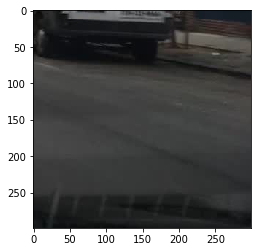

(720, 1280, 3)
1.0


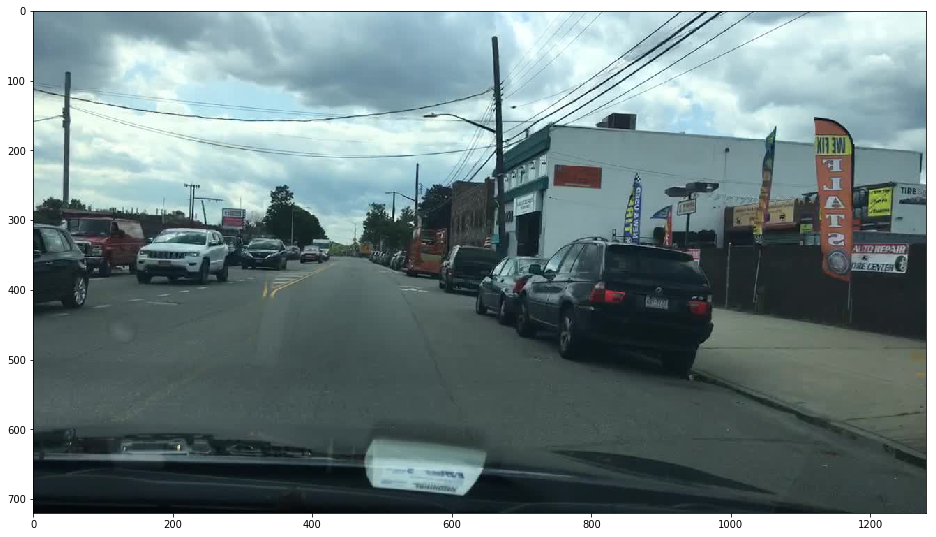

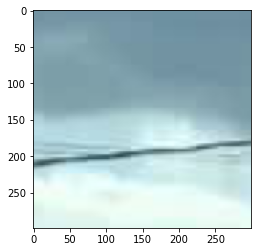

In [80]:
test_img = cv2.resize(x1[100:180, 420:500, :] / 255, (299, 299))
plt.imshow(test_img)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0601 13:46:12.069875 47297703942592 saver.py:1483] Saver not created because there are no variables in the graph to restore


b'geyser\n'


<tf.Tensor 'module_apply_default/InceptionResnetV2/Logits/Logits/BiasAdd:0' shape=(1, 1001) dtype=float32>

In [57]:
x1 = plt.imread(imgs[500])
x2 = cv2.imread(str(imgs[500]))

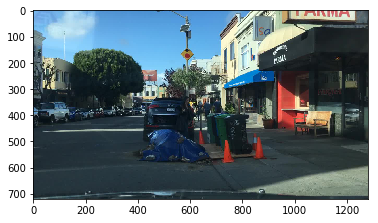

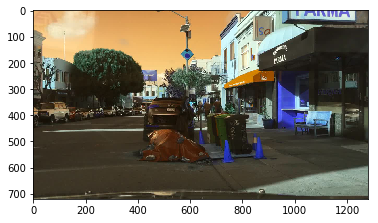

In [61]:
plt.figure()
plt.imshow(x1)
plt.figure()
plt.imshow(x2)

In [82]:
list(range(0,100,6))

[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96]

[0, 2, 4, 6, 8]

In [84]:
dim = 100
dx = 20
s = 2


In [89]:
list(range(0, 10-2+1, 2))

[0, 2, 4, 6, 8]